<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/iris_DT_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The Iris Dataset**


* 150 training cases
* Four (4) numeric attributes
* One categorical label (Setosa, Versicolor, Virginica)

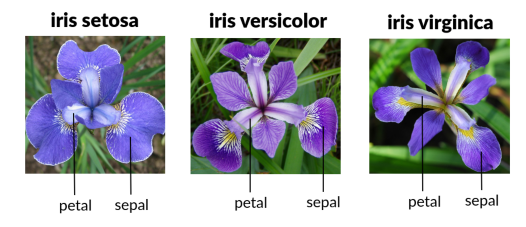


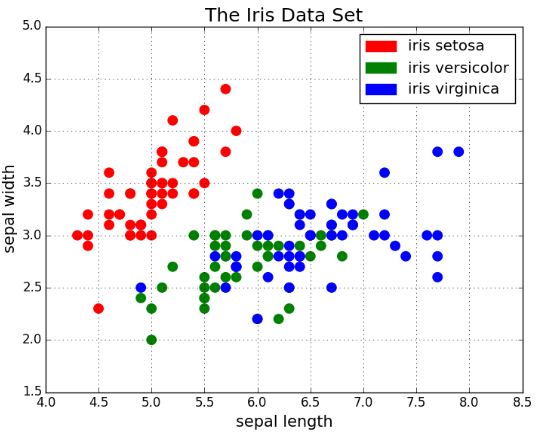


In [1]:
#@title The dataset

# 150 training cases
# Four (4) numeric attributes
# One categorical label (Setosa, Versicolor, Virginica)

summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [2]:
#@title Row Subsets

# First 5 rows of the subset Setosa

subset(iris, Species=="setosa")[1:5,]



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# First 5 rows of the subset Versicolor

subset(iris, Species=="versicolor")[1:5,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
54,5.5,2.3,4.0,1.3,versicolor
55,6.5,2.8,4.6,1.5,versicolor


In [4]:
# First 5 rows of the subset Virginica

subset(iris, Species=="virginica")[1:5,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica
104,6.3,2.9,5.6,1.8,virginica
105,6.5,3.0,5.8,2.2,virginica


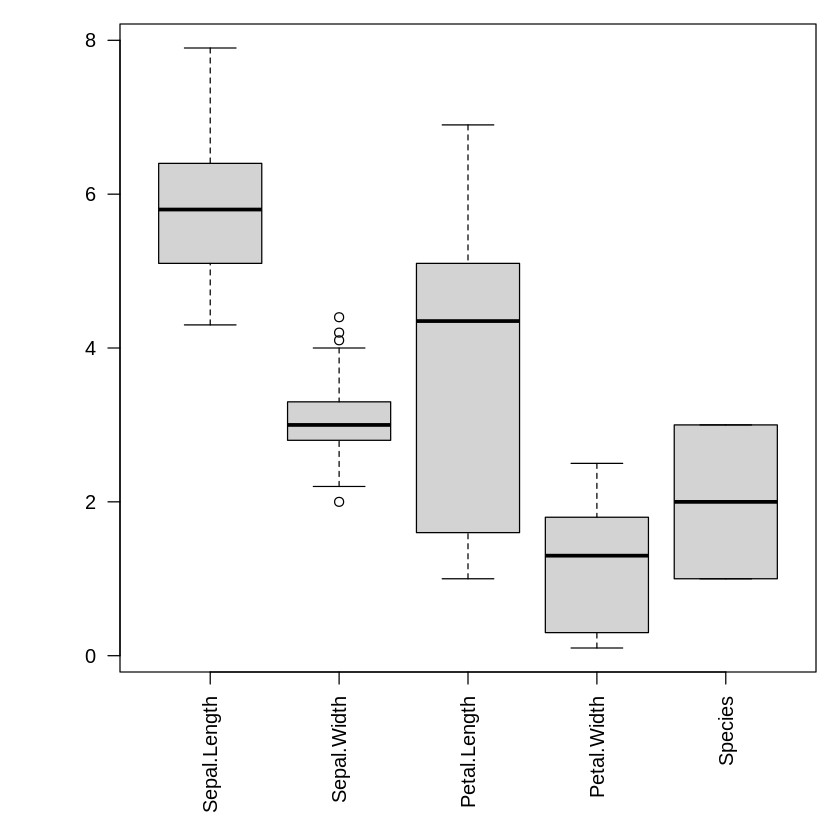

In [5]:
#@title Boxplots

# The par function can be used to create a simple multi-paneled plot.

# Boxplots can be created for individual variables or for variables by group.

par(mar=c(7,5,1,1))
boxplot(iris, las=2)


In [6]:
#@title Classification with Decision Trees

install.packages("C50")
library(C50)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’




In [9]:
#@title Prepare Input & Output for the DT Classifier

input <- iris[,1:4]
output <- iris[,5]

summary(input)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [10]:
summary(output)


setosa versicolor  virginica 
        50         50         50

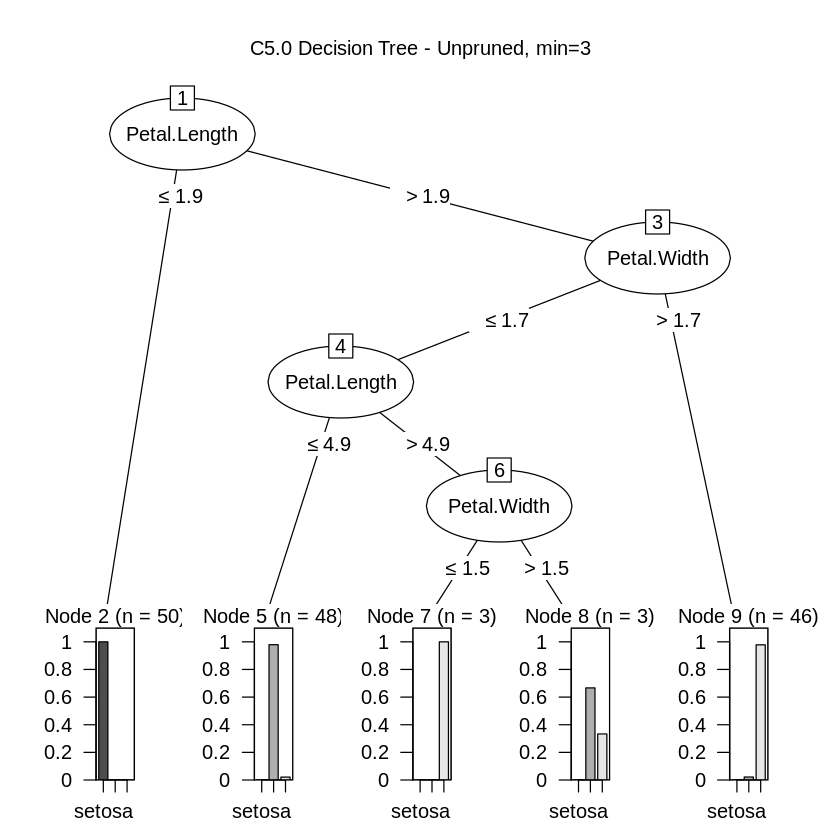

In [19]:
#@title Let’s build an unpruned decision tree and plot it (Model 1)

# see https://www.rdocumentation.org/packages/C50/versions/0.1.8/topics/C5.0Control
model1 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = TRUE, minCases=3))
plot(model1, main="C5.0 Decision Tree - Unpruned, min=3")



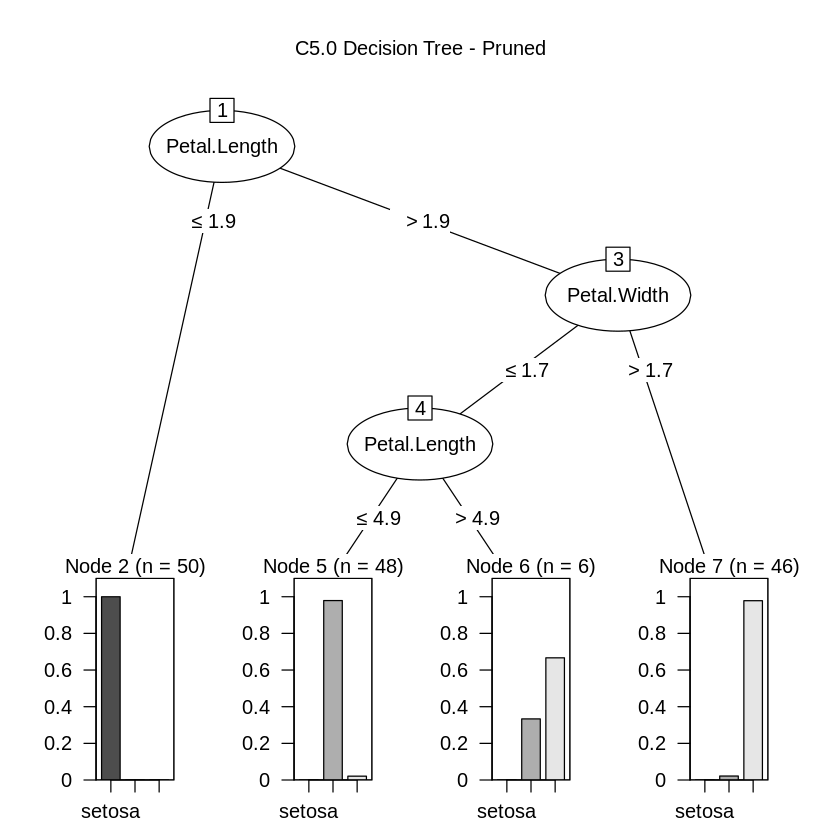

In [21]:
#@title Now, let’s build a pruned decision tree (Model 2)

model2 <- C5.0(input, output, control = C5.0Control(noGlobalPruning = FALSE))
plot(model2, main="C5.0 Decision Tree - Pruned")

In [24]:
#@title Evaluating a model and computing the confusion matrix:

summary(model2)


Call:
C5.0.default(x = input, y = output, control = C5.0Control(noGlobalPruning
 = FALSE))


C5.0 [Release 2.07 GPL Edition]  	Wed Nov 15 10:31:36 2023
-------------------------------

Class specified by attribute `outcome'

Read 150 cases (5 attributes) from undefined.data

Decision tree:

Petal.Length <= 1.9: setosa (50)
Petal.Length > 1.9:
:...Petal.Width > 1.7: virginica (46/1)
    Petal.Width <= 1.7:
    :...Petal.Length <= 4.9: versicolor (48/1)
        Petal.Length > 4.9: virginica (6/2)


Evaluation on training data (150 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4    4( 2.7%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    50                (a): class setosa
	          47     3    (b): class versicolor
	           1    49    (c): class virginica


	Attribute usage:

	100.00%	Petal.Length
	 66.67%	Petal.Width


Time: 0.0 secs


In [25]:
#@title Let’s use model2 to predict a few instances:

newcases <- iris[c(1:3,51:53,101:103),]
newcases

predict(model2, newcases, type="class")
predict(model2, newcases, type="prob")



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica


[1] setosa     setosa     setosa     versicolor versicolor versicolor virginica 
[8] virginica  virginica 
Levels: setosa versicolor virginica

,setosa,versicolor,virginica
1,0.986928104,0.006535948,0.006535948
2,0.986928104,0.006535948,0.006535948
3,0.986928104,0.006535948,0.006535948
51,0.006802721,0.965986394,0.027210885
52,0.006802721,0.965986394,0.027210885
53,0.006802721,0.965986394,0.027210885
101,0.007092199,0.028368795,0.964539006
102,0.007092199,0.028368795,0.964539006
103,0.007092199,0.028368795,0.964539006


In [26]:
#@title Creating rules from the tree:

rules_model <- C5.0(input, output, rules=TRUE)
summary(rules_model)





Call:
C5.0.default(x = input, y = output, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Wed Nov 15 10:32:45 2023
-------------------------------

Class specified by attribute `outcome'

Read 150 cases (5 attributes) from undefined.data

Rules:

Rule 1: (50, lift 2.9)
	Petal.Length <= 1.9
	->  class setosa  [0.981]

Rule 2: (48/1, lift 2.9)
	Petal.Length > 1.9
	Petal.Length <= 4.9
	Petal.Width <= 1.7
	->  class versicolor  [0.960]

Rule 3: (46/1, lift 2.9)
	Petal.Width > 1.7
	->  class virginica  [0.958]

Rule 4: (46/2, lift 2.8)
	Petal.Length > 4.9
	->  class virginica  [0.938]

Default class: setosa


Evaluation on training data (150 cases):

	        Rules     
	  ----------------
	    No      Errors

	     4    4( 2.7%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    50                (a): class setosa
	          47     3    (b): class versicolor
	           1    49    (c): class virginica


	Attribute usage:

	 96.00%	Petal.Length
	 62.67%	Petal.Width




## **Note**

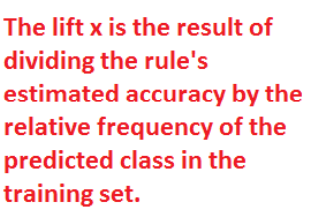